Text(0.5, 0, '@2024')

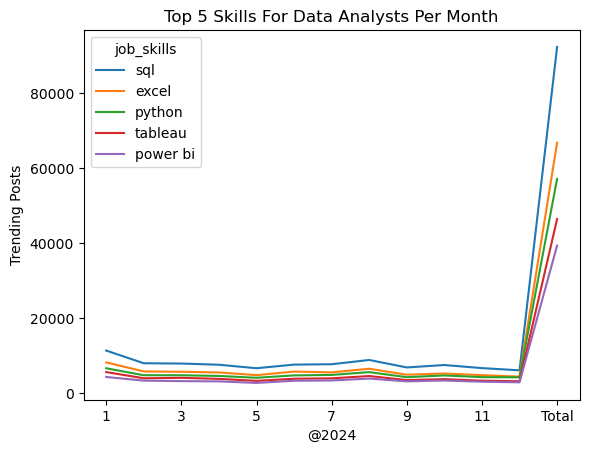

In [18]:
import ast 
import pandas as pd
import matplotlib.pyplot as plt
import ast

df = pd.read_csv('data_jobs.csv')
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month
#explode the job_skills into individual rows
df_DA_explode = df_DA.explode('job_skills')

df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size',fill_value=0)
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()

df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_pivot.drop('Total')
df_DA_pivot.iloc[:, :5].plot(kind='line')
plt.title('Top 5 Skills For Data Analysts Per Month')
plt.ylabel('Trending Posts')
plt.xlabel('@2024')

